In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

# How to get temperature data in sql
## Get global data sql query
```sql
SELECT * FROM global_data
```

## Get Soeul data sql query
```sql
SELECT * FROM city_data
WHERE city = 'Seoul'
```

# How to read data using python

* Temperature data download csv-file

* Dataset load `DataFrame` of Pandas

In [2]:
globalData = pd.read_csv("global_data.csv")
seoulData = pd.read_csv("seoul_data.csv")

print("Global Data Shape: {}".format(globalData.shape))
print("Seoul Data Shape: {}".format(seoulData.shape))


Global Data Shape: (266, 2)
Seoul Data Shape: (175, 4)


# Overview dataset

In [3]:
print(seoulData.head(10))
print("\n")
print(globalData.head(10))


   year   city      country  avg_temp
0  1839  Seoul  South Korea      9.47
1  1840  Seoul  South Korea     10.21
2  1841  Seoul  South Korea      9.44
3  1842  Seoul  South Korea     10.13
4  1843  Seoul  South Korea     10.33
5  1844  Seoul  South Korea     10.15
6  1845  Seoul  South Korea     10.25
7  1846  Seoul  South Korea     10.57
8  1847  Seoul  South Korea     10.59
9  1848  Seoul  South Korea     10.36


   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47
5  1755      8.36
6  1756      8.85
7  1757      9.02
8  1758      6.74
9  1759      7.99


# Calculate Moving Average and Transform DataFrame

In [4]:
def CalculateMovingAverage(df, windowSize = 7):
    data =[]
    for i in range(windowSize, df.shape[0] - windowSize):
        data.append([df.year[i], pd.DataFrame.sum(df.avg_temp[i - windowSize:i])/windowSize])

    dfTemp = pd.DataFrame(data = data, columns = ("year", "avg_temp"))
    return dfTemp

dfGlobal = CalculateMovingAverage(globalData, 7)
dfSeoul = CalculateMovingAverage(seoulData, 7)

# Calculate Statistical Measurements
* Standard deviation
* Mean
* Minimum and Maximum values
* Med

In [5]:
print("Statistical measurements of temperatures: ")
print("       Global   Seoul")
print("Std  : {:.4f}   {:.4f}".format(dfGlobal.avg_temp.std(), dfSeoul.avg_temp.std()))
print("Mean : {:.4f}   {:.4f}".format(dfGlobal.avg_temp.mean(), dfSeoul.avg_temp.mean()))
print("Min  : {:.4f}   {:.4f}".format(dfGlobal.avg_temp.min(), dfSeoul.avg_temp.min()))
print("Max  : {:.4f}   {:.4f}".format(dfGlobal.avg_temp.max(), dfSeoul.avg_temp.max()))
print("Med  : {:.4f}   {:.4f}".format(dfGlobal.avg_temp.median(), dfSeoul.avg_temp.median()))


Statistical measurements of temperatures: 
       Global   Seoul
Std  : 0.4276   0.4475
Mean : 8.3220   10.6298
Min  : 7.1914   9.9543
Max  : 9.5414   11.9514
Med  : 8.2943   10.5529


# Visualization Data using Matplotlib

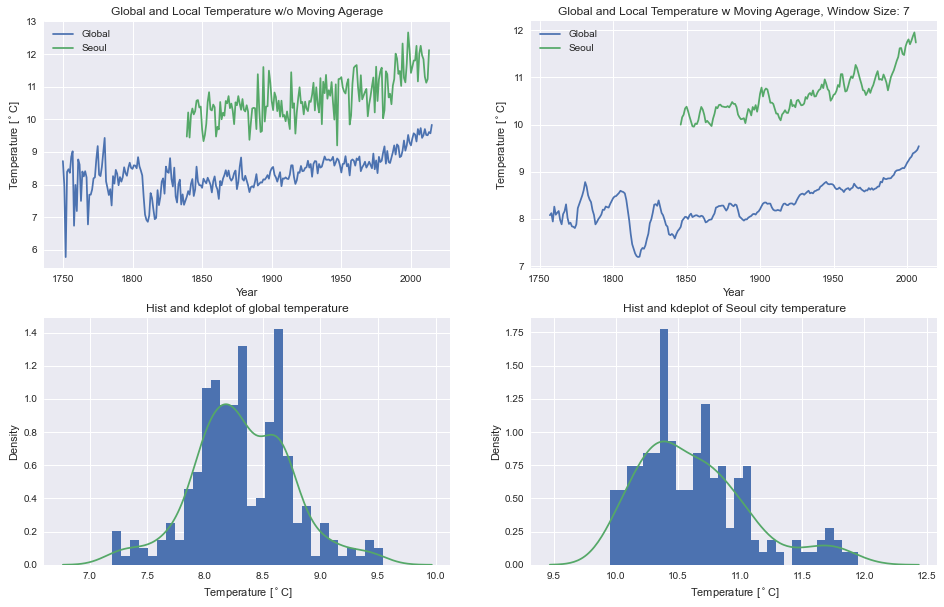

In [29]:
fig, ax = plt.subplots(2,2, figsize = (16, 10))

ax[0,0].plot(globalData.year, globalData.avg_temp, label = "Global")
ax[0,0].plot(seoulData.year, seoulData.avg_temp, label = "Seoul")
ax[0,0].set_title("Global and Local Temperature w/o Moving Agerage")
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Temperature [$^\circ$C]")
ax[0,0].legend()

ax[0, 1].plot(dfGlobal.year, dfGlobal.avg_temp, label = "Global")
ax[0, 1].plot(dfSeoul.year, dfSeoul.avg_temp, label = "Seoul")
ax[0, 1].set_title("Global and Local Temperature w Moving Agerage, Window Size: 7")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Temperature [$^\circ$C]")
ax[0, 1].legend()

ax[1, 0].hist(dfGlobal.avg_temp, bins = 30, density = True)
sns.kdeplot(ax = ax[1,0], x = dfGlobal.avg_temp)
ax[1, 0].set_title("Hist and kdeplot of global temperature")
ax[1, 0].set_xlabel("Temperature [$^\circ$C]")

ax[1, 1].hist(dfSeoul.avg_temp, bins = 30, density = True)
sns.kdeplot(ax = ax[1,1], x = dfSeoul.avg_temp)
ax[1, 1].set_xlabel("Temperature [$^\circ$C]")
ax[1, 1].set_title("Hist and kdeplot of Seoul city temperature")

plt.show()

In [40]:
print(dfGlobal.avg_temp[np.where(dfGlobal.year == 2000)[0]].item()\
     - dfGlobal.avg_temp[np.where(dfGlobal.year == 1850)[0]].item())
print(seoulData.avg_temp[np.where(seoulData.year == 2000)[0]].item()\
     - seoulData.avg_temp[np.where(seoulData.year == 1850)[0]].item())

1.1485714285714277
1.7300000000000004


# Observations
* Temperature of the world is mean 8.32 $^\circ$C and standard deviation 0.43 $^\circ$C
* Temperature of Seoul city is mean 10.63 $^\circ$C and standard deviation 0.45 $^\circ$C
* Mean of temperature of Seoul city is greater than the world over 2.30 $^\circ$C
* The world temperature is increased 1.15 $^\circ$C from 1850 to 2000 
* Seoul city temperature is increased 1.73 $^\circ$C from 1850 to 2000
* Temperature increase in Seoul city is 0.48 $^\circ$C higher than the world 